In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

##### 在三维空间中产生四个簇，共1000个样本

/home/yabin/anaconda3/envs/TF2/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


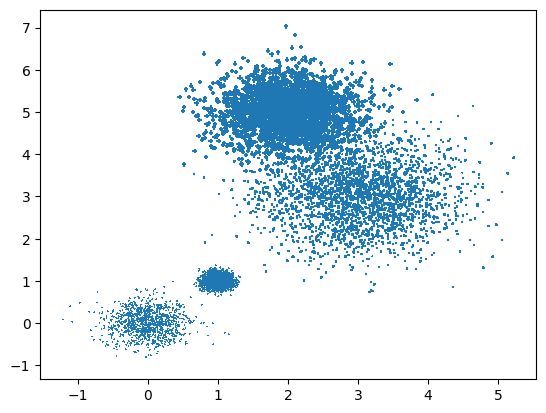

In [2]:
X, _ = make_blobs(n_samples=10000, n_features=3, centers=[[0,0,0], [1,1,0.5], [3,3,3], [2,5,10]], cluster_std=[0.3, 0.1, 0.7, 0.5])
fig = plt.figure()
ax = Axes3D(fig)
plt.scatter(X[:, 0], X[:, 1], X[:, 2], marker='+')
plt.show()

##### 看一下它们在三个面上的投影

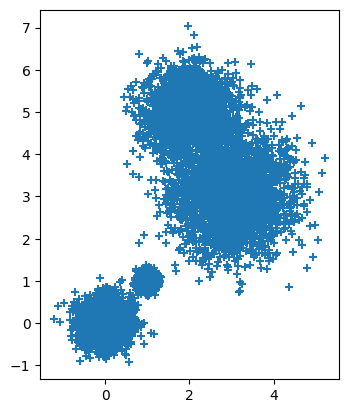

In [3]:
plt.axes(aspect='equal')
plt.scatter(X[:, 0], X[:, 1], marker='+')
plt.show()

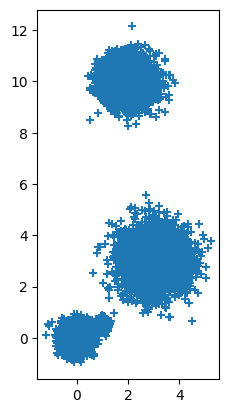

In [4]:
plt.axes(aspect='equal')
plt.scatter(X[:, 0], X[:, 2], marker='+')
plt.show()

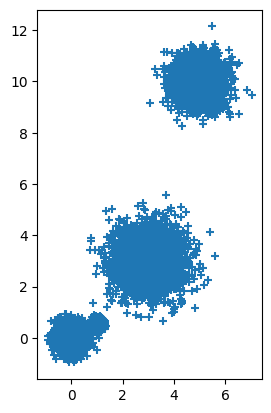

In [5]:
plt.axes(aspect='equal')
plt.scatter(X[:, 1], X[:, 2], marker='+')
plt.show()

##### 用PCA找出的平面投影

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.92741732 0.06297781]


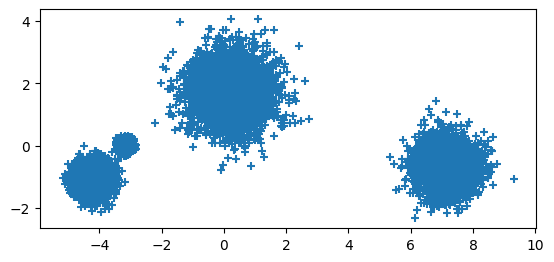

In [7]:
X_new = pca.transform(X)
plt.axes(aspect='equal')
plt.scatter(X_new[:, 0], X_new[:, 1],marker='+')
plt.show()

##### PCA指定主成分的其他用法示例

In [8]:
pca = PCA(n_components=0.9)
pca.fit(X)
print(pca.explained_variance_ratio_)
print("降维后的特征数：" + str(pca.n_components_))

[0.92741732]
降维后的特征数：1


In [9]:
pca = PCA(n_components=0.99)
pca.fit(X)
print(pca.explained_variance_ratio_)
print("降维后的特征数：" + str(pca.n_components_))

[0.92741732 0.06297781]
降维后的特征数：2


       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
(150, 2)


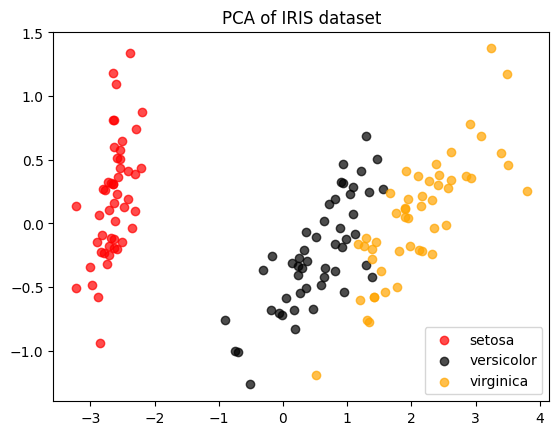

[4.22824171 0.24267075]
[0.92461872 0.05306648]
0.977685206318795


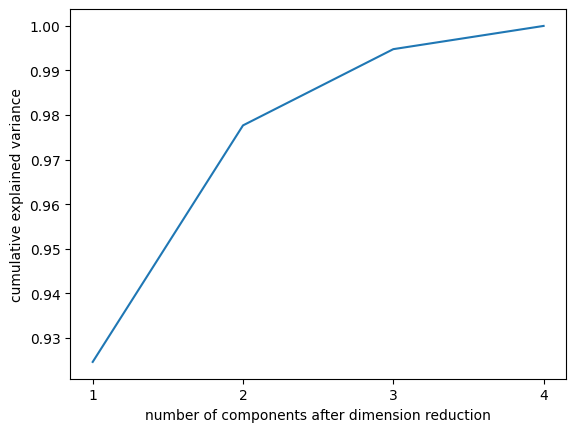

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
print(pd.DataFrame(X))

# 调用PCA
pca = PCA(n_components=2)  # 实例化 此处使用2代表降维到2个特征值，也可取mle让程序使用最大似然估计自己找寻最合适的降维超参数
pca = pca.fit(X)  # 拟合模型
X_dr = pca.transform(X)  # 获取新矩阵
# X_dr = PCA(2).fit_transform(X)  # 同上两步
print(X_dr.shape)

plt.figure()
colors = ['red', 'black', 'orange']
for i in range(0, 3):
    # 画点图
    plt.scatter(X_dr[y==i, 0], X_dr[y==i, 1]
                , alpha=.7 # 透明度设置
                , c=colors[i], label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

# 查看降维后每个新特征向量上所带的信息量大小，即方差大小
print(pca.explained_variance_)

# 查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
# 又叫可解释性方差贡献率
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

# 累计可解释方差贡献率曲线来选择最好的n_components
pca_line = PCA().fit(X)
plt.plot([1, 2, 3, 4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4])  # 限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance")
plt.show()
